Copyright 2024 - Forusone : shins777@gmail.com

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

   https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

# Gemini Pro - Using Vertex AI Search as a grounding service.

* This notebook explains how to use grounding service in Gemini Pro.
* Refer to https://cloud.google.com/vertex-ai/generative-ai/docs/grounding/overview
* Architecture for Grounding with Google Search
 * [Grounding with Google search](https://cloud.google.com/static/vertex-ai/generative-ai/docs/images/gemini/overview-grounding.png)

* Using Vertex AI Search :
  * https://cloud.google.com/vertex-ai/generative-ai/docs/grounding/overview#ground-private

# Configuration
## Install python packages
* Vertex AI SDK for Python
  * https://cloud.google.com/python/docs/reference/aiplatform/latest


In [1]:
%pip install --upgrade --quiet google-cloud-aiplatform

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.7 MB/s eta 0:00:00


In [2]:
from IPython.display import display, Markdown

## Authentication to access to the GCP & Google drive

* Use OAuth to access the GCP environment.
 * Refer to the authentication methods in GCP : https://cloud.google.com/docs/authentication?hl=ko

In [4]:
#  For only colab to authenticate to get an access to the GCP.
import sys

if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()

    # Mount to the google drive to access the .ipynb files in the repository.
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


* **굵은 텍스트** Mount to the google drive to access the .ipynb files in the repository.

# Execute the example
## Set the environment on GCP Project
* Configure project information
  * Model name : LLM model name : https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models
  * Project Id : prodect id in GCP
  * Region : region name in GCP

In [5]:
MODEL_NAME="gemini-1.5-flash"
PROJECT_ID="ai-hangsik"
REGION="asia-northeast3"

### Vertex AI initialization
Configure Vertex AI and access to the foundation model.
* Vertex AI initialization : aiplatform.init(..)
  * https://cloud.google.com/python/docs/reference/aiplatform/latest#initialization

In [29]:
import vertexai
from vertexai.generative_models import GenerationConfig, GenerativeModel, Part, Tool
import vertexai.generative_models as generative_models

# Grounding service is still in preview.
from vertexai.preview.generative_models import grounding

# Initalizate the current vertex AI execution environment.
vertexai.init(project=PROJECT_ID, location=REGION)

# Access to the generative model.
model = GenerativeModel(MODEL_NAME)

## Prompt sent to LLM

In [45]:
prompt ="민간 부문의 양자 정보 통신 기술 개발 지원에 대해서 설명해주세요."

## Response without grounding services.
This response is information from LLM without grounding services to enrich contexts sent to LLM.

In [46]:
response = model.generate_content(prompt)
display(Markdown(response.text))

## 민간 부문의 양자 정보 통신 기술 개발 지원: 미래를 위한 투자

양자 정보 통신 기술은 암호 해독 불가능한 보안 통신, 초고속 데이터 전송 등 혁신적인 가능성을 열어주는 미래 기술입니다. 이러한 잠재력을 실현하기 위해서는 민간 부문의 적극적인 참여와 투자가 필수적입니다. 

**민간 부문 지원의 중요성:**

* **혁신과 경쟁:** 민간 기업들은 기술 개발 및 상용화에 대한 강력한 동기와 경쟁력을 갖추고 있습니다. 정부 지원과 민간 부문의 협력은 기술 발전을 가속화하고 상용화 시기를 앞당길 수 있습니다.
* **시장 확대:** 민간 기업들은 시장 수요를 파악하고 새로운 응용 분야를 발굴하여 양자 기술의 시장 확대를 주도할 수 있습니다. 
* **투자 유치:** 민간 투자는 기술 개발에 필요한 자금을 확보하고 사업화를 위한 기반을 마련하는 데 중요한 역할을 합니다.

**민간 부문 지원 방안:**

* **R&D 지원:** 정부는 연구 개발 지원, 기술 사업화 지원, 인력 양성 프로그램 등을 통해 민간 기업의 양자 기술 개발을 촉진해야 합니다. 
* **규제 완화:** 양자 기술 관련 규제를 완화하고 혁신적인 기술 개발과 사업화를 위한 환경을 조성해야 합니다. 
* **표준화 및 상호 운용성 확보:** 국제 표준 개발 참여 및 산업 간 협력을 통해 기술 간 호환성을 확보하고 시장 확대를 위한 기반을 마련해야 합니다.
* **인력 양성:** 양자 정보 통신 분야의 전문 인력 양성 프로그램을 지원하고 관련 교육 과정을 확대하여 인력 부족 문제를 해결해야 합니다.
* **공동 연구 및 기술 개발:** 정부 연구 기관과 민간 기업 간 협력 연구를 통해 기술 개발을 가속화하고 시너지 효과를 창출해야 합니다.

**양자 정보 통신 기술 개발 지원은 미래 경쟁력 확보를 위한 필수적인 투자입니다.** 

* **안전하고 신뢰할 수 있는 통신 네트워크 구축:** 양자 암호 통신 기술은 기존 암호 체계를 뛰어넘는 보안성을 제공하여 사이버 공격으로부터 중요한 정보를 안전하게 보호할 수 있습니다.
* **고성능 컴퓨팅 및 빅데이터 분석:** 양자 컴퓨팅 기술은 복잡한 문제 해결, 신약 개발, 재료 과학 등 다양한 분야에서 혁신을 가져올 수 있습니다.
* **첨단 산업 경쟁력 강화:** 양자 기술은 인공지능, 자율 주행, 의료, 제조 등 다양한 산업 분야의 발전에 기여하여 국가 경쟁력을 강화하는 데 중요한 역할을 할 것입니다.

**정부와 민간 부문의 협력을 통해 양자 정보 통신 기술 개발을 적극적으로 지원해야 미래 사회의 지속적인 성장과 발전을 이끌어낼 수 있습니다.**


##Configuration Vertex AI Search

In [47]:
DATA_STORE_PROJECT_ID = PROJECT_ID
DATA_STORE_REGION = "global"

# Note : Only Digital parser datastore is possible to us grounding service as of Aug 2024

DATA_STORE_ID = "hackathon-ds_1709838247983"

## Execute request to LLM with grounding servcies supported by Vertex AI search.

In [48]:

# datastore = f"projects/{DATA_STORE_PROJECT_ID}/locations/{DATA_STORE_REGION}/collections/default_collection/dataStores/{DATA_STORE_ID}"

data_store_path = f"projects/{DATA_STORE_PROJECT_ID}/locations/{DATA_STORE_REGION}/collections/default_collection/dataStores/{DATA_STORE_ID}"


tool = Tool.from_retrieval(
    grounding.Retrieval(grounding.VertexAISearch(datastore=data_store_path))
)

response = model.generate_content(prompt, tools=[tool])

display(Markdown(response.text))

2023년 10월 31일부터 정보통신 진흥 및 융합 활성화 등에 관한 특별법(법률) 제27조의3이 삭제되어, 민간 부문의 양자 정보 통신 기술 개발 지원에 대한 법적 근거가 사라졌습니다. 따라서 현재는 정부가 민간 부문의 양자 정보 통신 기술 개발을 직접적으로 지원하는 법적 근거는 없습니다. 


## Fact finding

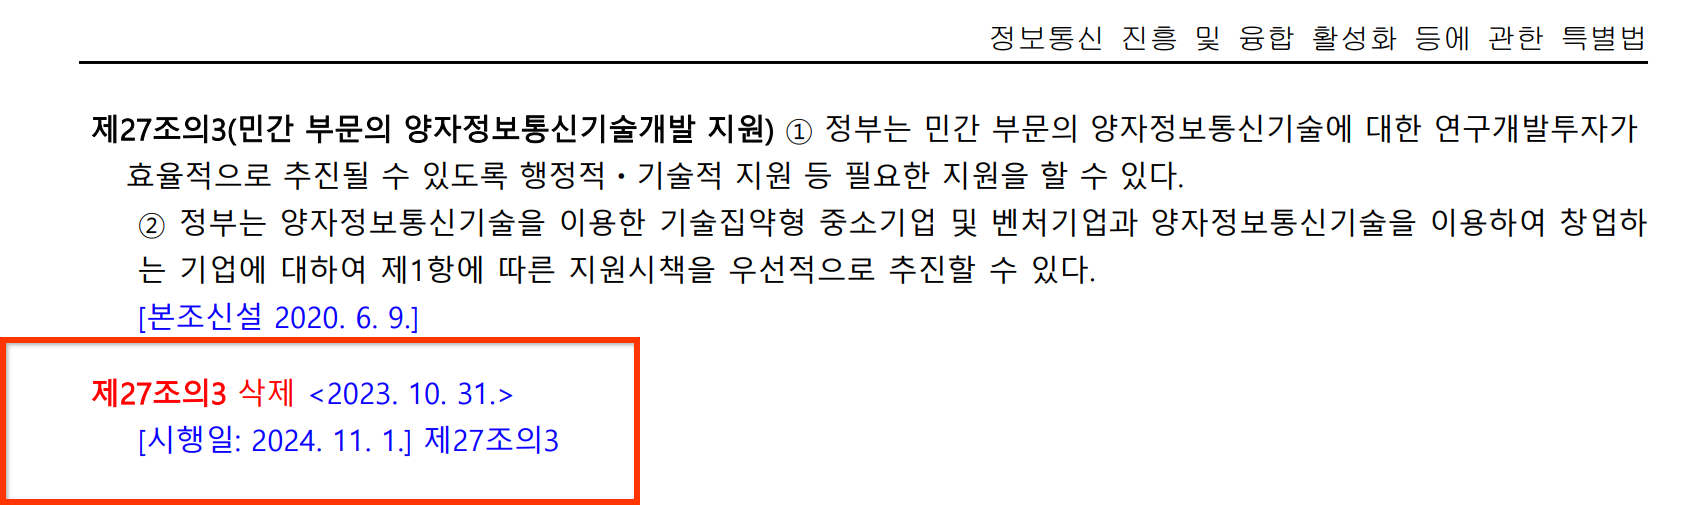

In [49]:
from IPython.display import Image
image_path = "/content/drive/MyDrive/projects/google_gen_ai_sample/contents/images/"
image_file = "grounding_service_vertexai.png"
Image(f"{image_path}{image_file}", width=700, height=300)

